# Comparative Analysis of Machine Learning and Deep Learning Models for Car Price Prediction

Accurately predicting car prices is a critical task for numerous industries, including automotive sales, insurance, and online marketplaces, as it directly impacts decision-making processes and business profitability. In automotive sales, precise pricing models ensure that dealers and manufacturers can set competitive yet fair prices, balancing profitability with customer satisfaction. For insurance companies, accurate car price predictions are essential for determining premiums, assessing risk, and calculating claim settlements, especially in cases of vehicle damage or theft. Online marketplaces, which connect buyers and sellers, rely heavily on car price prediction algorithms to provide users with realistic and dynamic price suggestions, enhancing trust and user engagement on their platforms. Additionally, predictive pricing is vital for financial institutions offering car loans, enabling them to assess the value of collateral accurately. By leveraging data on car specifications, market trends, and historical sales, businesses can make data-driven decisions, optimize operations, and deliver tailored solutions to customers. In this context, exploring advanced methods like Machine Learning (ML) and Deep Learning (DL) for car price prediction can unlock significant value, offering greater accuracy and adaptability to ever-changing market conditions.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df = pd.read_csv(r"C:/Users/Asus/Desktop/Rishabh/car_data.csv")

In [3]:
#First few rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Understanding

In [4]:
print(f"Number of rows in the dataset:", df.shape[0])
print(f"Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 301
Number of columns in the dataset: 9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print(df.isnull().sum())
print("-------------------------------")
if df.isnull().sum().values.sum() == 0:
    print("The data has no missing values!")

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
-------------------------------
The data has no missing values!


In [7]:
df["Car_Name"].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [8]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [9]:
df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [10]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [11]:
df["Owner"].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [12]:
df["Year"].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

## Adding new column

In [13]:
Current_Year = 2024

In [14]:
df["Car_Age"] = df["Year"].apply(lambda x: Current_Year-x)

### Encoding Categorical Data

In [15]:
le = LabelEncoder()

In [16]:
df["Fuel_Type_Encoded"] = le.fit_transform(df["Fuel_Type"])
df["Seller_Type_Encoded"] = le.fit_transform(df["Seller_Type"])
df["Transmission_Encoded"] = le.fit_transform(df["Transmission"])

In [17]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Age',
       'Fuel_Type_Encoded', 'Seller_Type_Encoded', 'Transmission_Encoded'],
      dtype='object')

In [18]:
df = df[['Car_Name', 'Year', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Car_Age', 'Kms_Driven', 'Fuel_Type_Encoded', 'Seller_Type_Encoded', 'Transmission_Encoded', 'Owner', 'Present_Price', 'Selling_Price']]

In [19]:
df.head()

,Car_Name,Year,Fuel_Type,Seller_Type,Transmission,Car_Age,Kms_Driven,Fuel_Type_Encoded,Seller_Type_Encoded,Transmission_Encoded,Owner,Present_Price,Selling_Price
0,ritz,2014,Petrol,Dealer,Manual,10,27000,2,0,1,0,5.59,3.35
1,sx4,2013,Diesel,Dealer,Manual,11,43000,1,0,1,0,9.54,4.75
2,ciaz,2017,Petrol,Dealer,Manual,7,6900,2,0,1,0,9.85,7.25
3,wagon r,2011,Petrol,Dealer,Manual,13,5200,2,0,1,0,4.15,2.85
4,swift,2014,Diesel,Dealer,Manual,10,42450,1,0,1,0,6.87,4.60


### Statistical Analysis

In [20]:
df.describe()

,Year,Car_Age,Kms_Driven,Fuel_Type_Encoded,Seller_Type_Encoded,Transmission_Encoded,Owner,Present_Price,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,10.372093,36947.205980,1.787375,0.352159,0.867110,0.043189,7.628472,4.661296
std,2.891554,2.891554,38886.883882,0.425801,0.478439,0.340021,0.247915,8.644115,5.082812
min,2003.000000,6.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.320000,0.100000
25%,2012.000000,8.000000,15000.000000,2.000000,0.000000,1.000000,0.000000,1.200000,0.900000
50%,2014.000000,10.000000,32000.000000,2.000000,0.000000,1.000000,0.000000,6.400000,3.600000
75%,2016.000000,12.000000,48767.000000,2.000000,1.000000,1.000000,0.000000,9.900000,6.000000
max,2018.000000,21.000000,500000.000000,2.000000,1.000000,1.000000,3.000000,92.600000,35.000000


### Visualisations

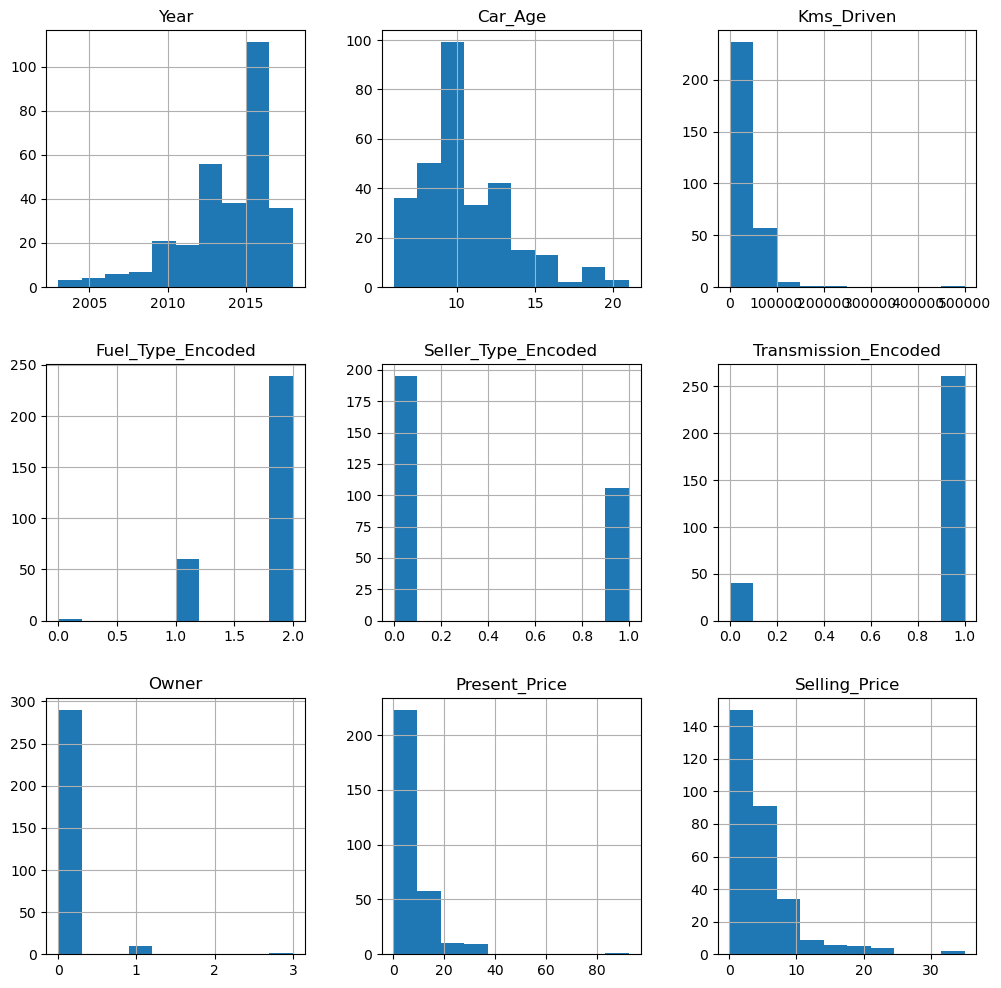

In [21]:
#Histogram
df.hist(figsize=(12,12))
plt.show()

In [22]:
df1 = df.iloc[:,5:]

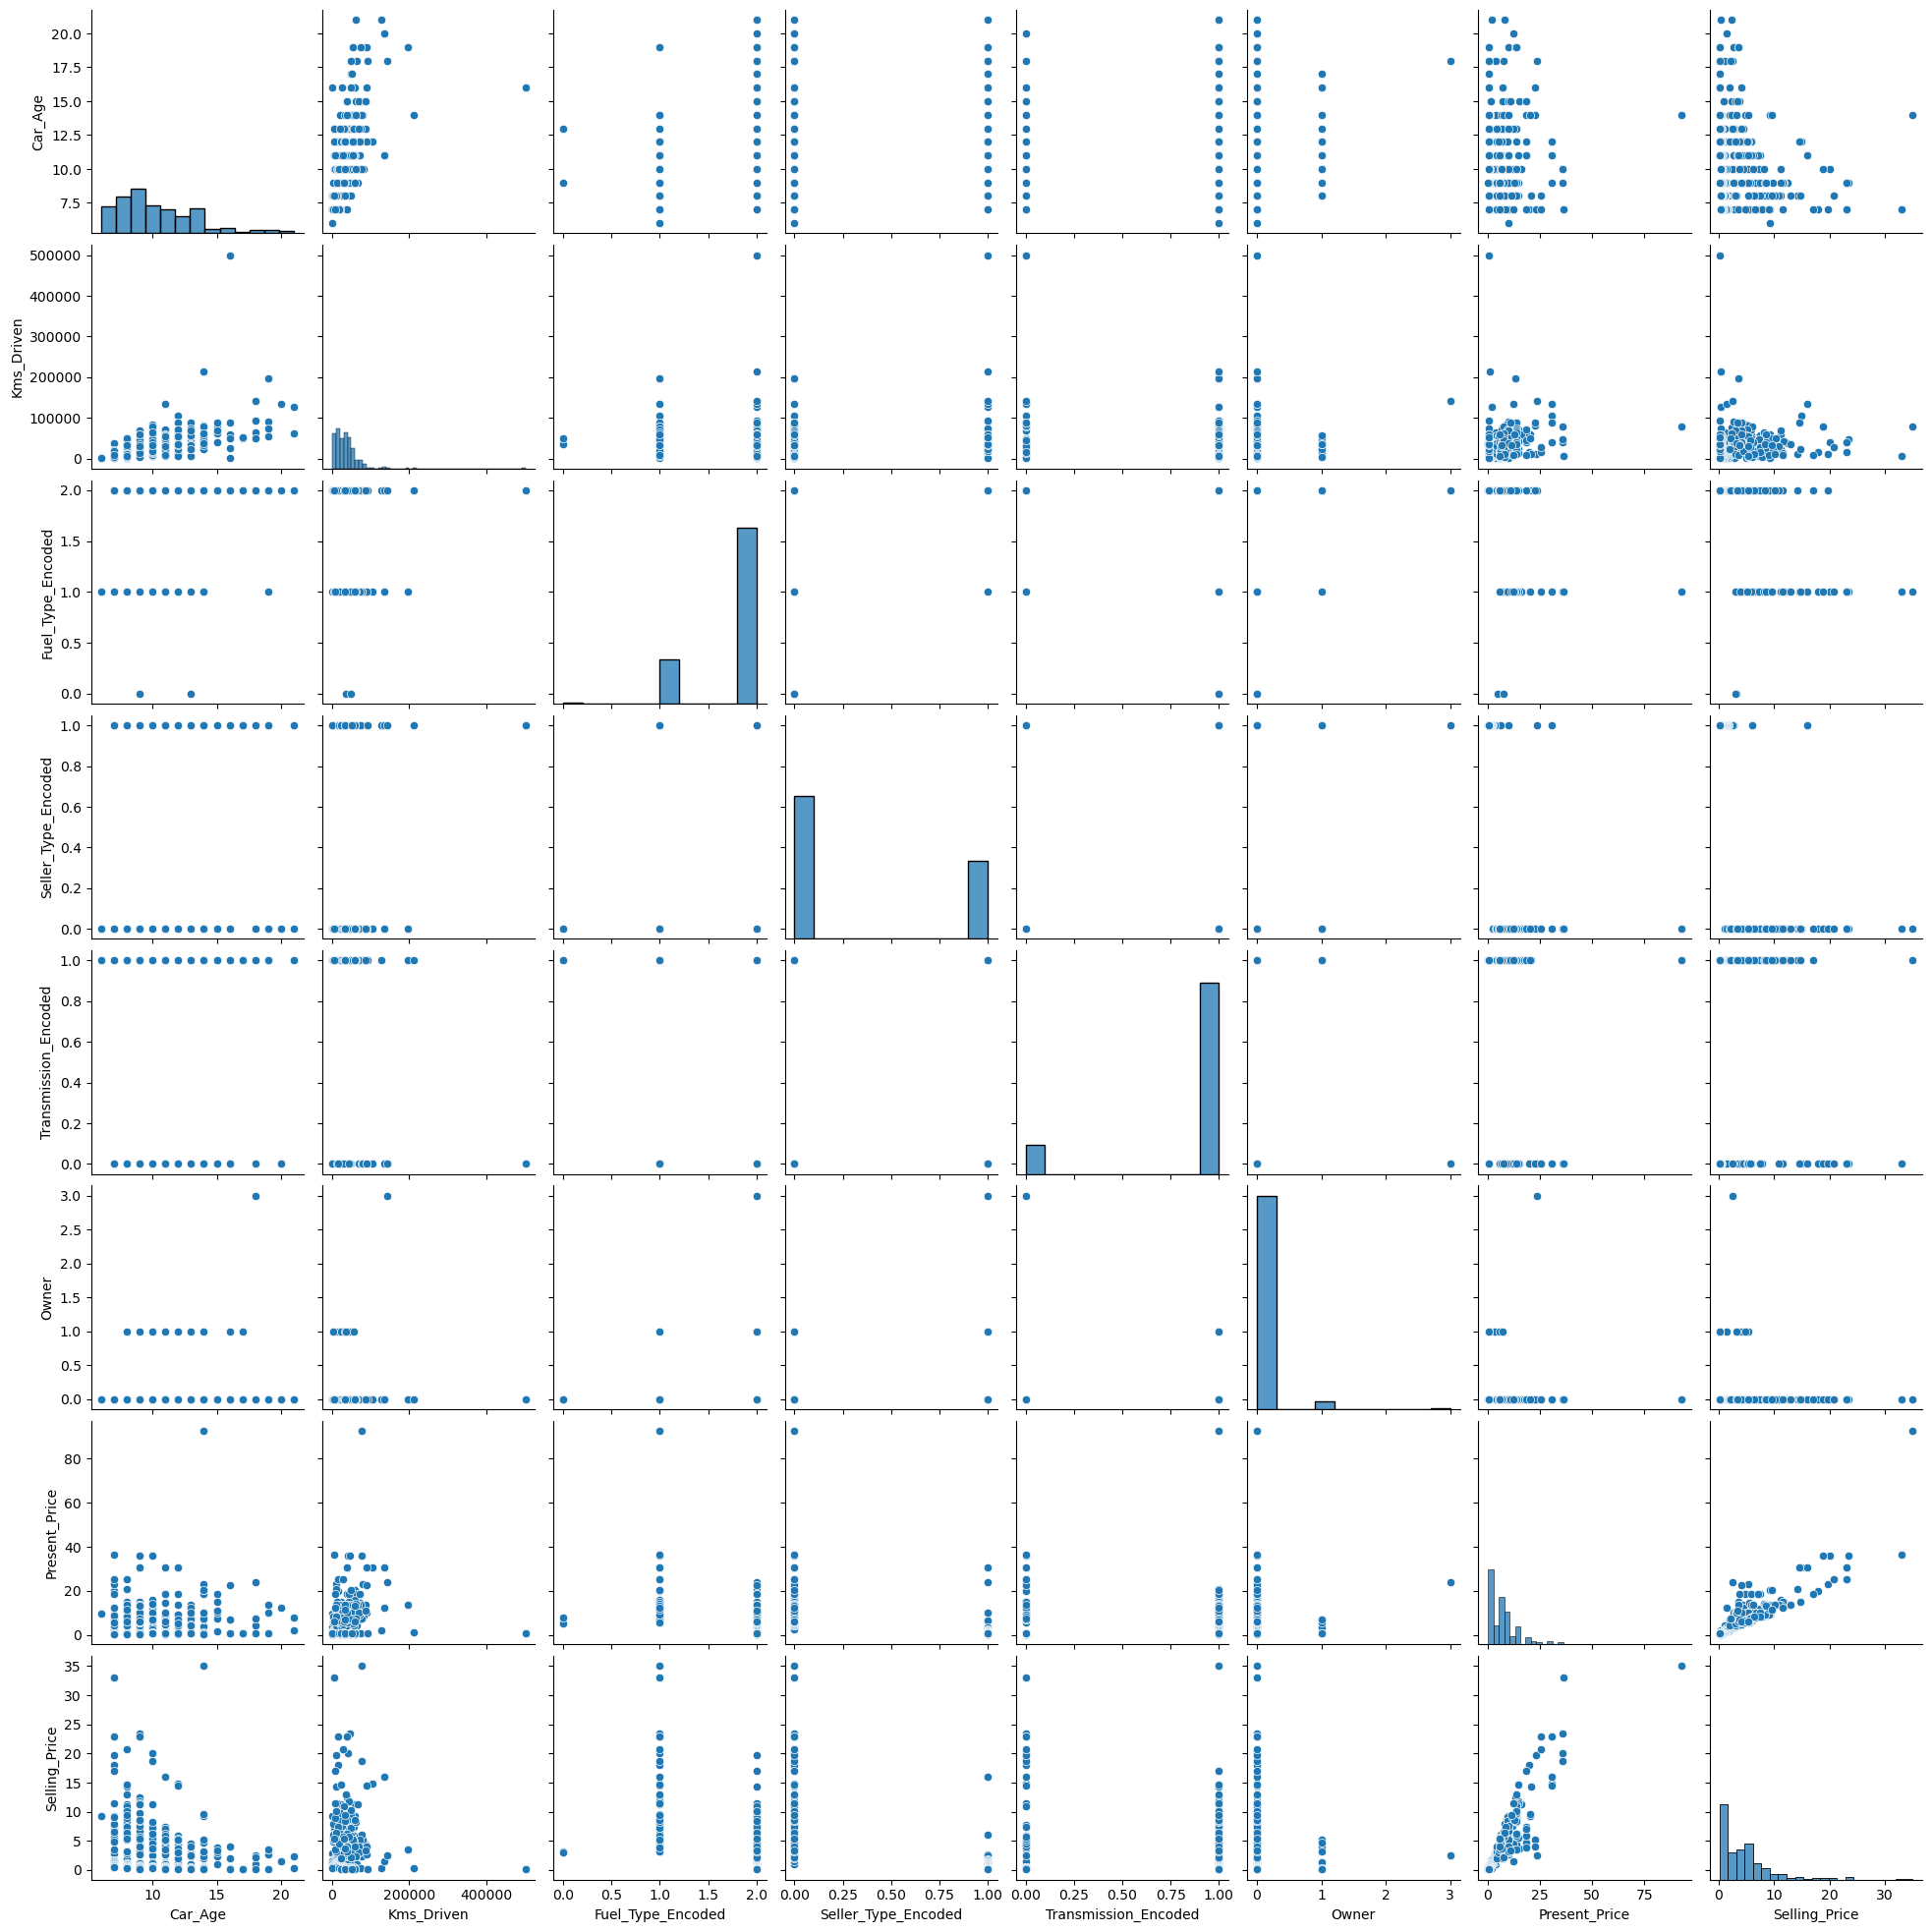

In [23]:
# Pairplot
sns.pairplot(data=df1)
plt.show()

### Visualising the correlation-matrix 

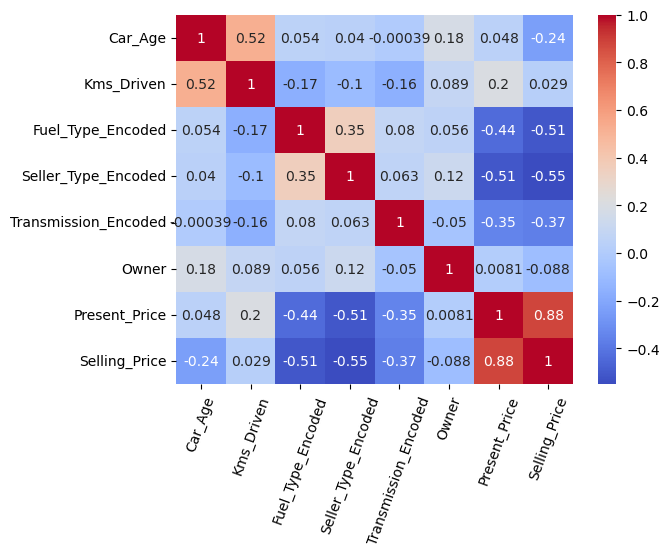

In [24]:
sns.heatmap(df1.corr(), cmap="coolwarm", annot=True)
plt.xticks(rotation=70)
plt.show()

### Feature Scaling

In [25]:
#Features
X = df.iloc[:,5:-1]
X

,Car_Age,Kms_Driven,Fuel_Type_Encoded,Seller_Type_Encoded,Transmission_Encoded,Owner,Present_Price
0,10,27000,2,0,1,0,5.59
1,11,43000,1,0,1,0,9.54
2,7,6900,2,0,1,0,9.85
3,13,5200,2,0,1,0,4.15
4,10,42450,1,0,1,0,6.87
...,...,...,...,...,...,...,...
296,8,33988,1,0,1,0,11.60
297,9,60000,2,0,1,0,5.90
298,15,87934,2,0,1,0,11.00
299,7,9000,1,0,1,0,12.50


In [26]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled

,Car_Age,Kms_Driven,Fuel_Type_Encoded,Seller_Type_Encoded,Transmission_Encoded,Owner,Present_Price
0,-0.128897,-0.256224,0.500183,-0.737285,0.39148,-0.174501,-0.236215
1,0.217514,0.155911,-1.852241,-0.737285,0.39148,-0.174501,0.221505
2,-1.168129,-0.773969,0.500183,-0.737285,0.39148,-0.174501,0.257427
3,0.910335,-0.817758,0.500183,-0.737285,0.39148,-0.174501,-0.403079
4,-0.128897,0.141743,-1.852241,-0.737285,0.39148,-0.174501,-0.087890
...,...,...,...,...,...,...,...
296,-0.821718,-0.076225,-1.852241,-0.737285,0.39148,-0.174501,0.460214
297,-0.475308,0.593804,0.500183,-0.737285,0.39148,-0.174501,-0.200292
298,1.603156,1.313340,0.500183,-0.737285,0.39148,-0.174501,0.390687
299,-1.168129,-0.719876,-1.852241,-0.737285,0.39148,-0.174501,0.564504


In [27]:
#Target
y = df.iloc[:,-1:]
y.columns = df.iloc[:,-1:].columns
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


### Splitting the Data into Train-set and Test-set 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

### Training the Linear Regression Model

In [29]:
#Initializing the Linear Regression model
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='linear')
knr = KNeighborsRegressor(n_neighbors=5)
xgbr = xgb.XGBRegressor(n_estimators=100, random_state=42)

In [30]:
#Training the data
lr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
svr.fit(X_train, y_train)
knr.fit(X_train, y_train)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [31]:
y_pred1 = lr.predict(X_test)
y_pred2 = dtr.predict(X_test)
y_pred3 = rfr.predict(X_test)
y_pred4 = svr.predict(X_test)
y_pred5 = knr.predict(X_test)
y_pred6 = xgbr.predict(X_test)

#### Checking the accuracy of the Model

In [32]:
print("Linear Regression Model")
print(f"Mean Squared Error:", mean_squared_error(y_pred1, y_test))
print(f"R-squared score:", r2_score(y_pred1, y_test))
print("------------------------------------------------")
print("Decision Tree Regressor Model")
print(f"Mean Squared Error:", mean_squared_error(y_pred2, y_test))
print(f"R-squared score:", r2_score(y_pred2, y_test))
print("------------------------------------------------")
print("Random Forest Regressor Model")
print(f"Mean Squared Error:", mean_squared_error(y_pred3, y_test))
print(f"R-squared score:", r2_score(y_pred3, y_test))
print("------------------------------------------------")
print("Support Vector Machine Regressor Model")
print(f"Mean Squared Error:", mean_squared_error(y_pred4, y_test))
print(f"R-squared score:", r2_score(y_pred4, y_test))
print("------------------------------------------------")
print("k Neighbours Regressor Model")
print(f"Mean Squared Error:", mean_squared_error(y_pred5, y_test))
print(f"R-squared score:", r2_score(y_pred5, y_test))
print("------------------------------------------------")
print("Extreme Gradient Boosting Regressor Model")
print(f"Mean Squared Error:", mean_squared_error(y_pred6, y_test))
print(f"R-squared score:", r2_score(y_pred6, y_test))

Linear Regression Model
Mean Squared Error: 3.7578448245759506
R-squared score: 0.8291882561696109
------------------------------------------------
Decision Tree Regressor Model
Mean Squared Error: 1.1609269999999998
R-squared score: 0.9480610236307089
------------------------------------------------
Random Forest Regressor Model
Mean Squared Error: 1.1268304304000005
R-squared score: 0.9539111255239808
------------------------------------------------
Support Vector Machine Regressor Model
Mean Squared Error: 4.044774510394882
R-squared score: 0.8121005895617128
------------------------------------------------
k Neighbours Regressor Model
Mean Squared Error: 3.6691292000000004
R-squared score: 0.8420056537284863
------------------------------------------------
Extreme Gradient Boosting Regressor Model
Mean Squared Error: 0.973936912824248
R-squared score: 0.9578521847724915


# Building a Deep Learning Model

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [34]:
X_train.shape

(201, 7)

In [35]:
#Building the deep learning model
model = Sequential()

In [36]:
# Adding layers (input layer + hidden layers)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

In [37]:
# Output layer (single neuron for regression)
model.add(Dense(1))

In [38]:
import keras
# Compiling the model with an optimizer, loss function, and metrics
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 43.8351 - mae: 4.1242 - val_loss: 14.3158 - val_mae: 2.5961
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.4122 - mae: 2.1656 - val_loss: 3.9079 - val_mae: 1.2653
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.0591 - mae: 1.3821 - val_loss: 1.4007 - val_mae: 0.8363
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.1388 - mae: 1.3259 - val_loss: 2.5153 - val_mae: 1.1943
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.6111 - mae: 1.5166 - val_loss: 2.8717 - val_mae: 1.2389
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.4842 - mae: 1.0426 - val_loss: 4.1621 - val_mae: 1.2842
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.7346 - mae: 1.1902 - val_loss: 2.8926 - val_mae: 1.1115
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.0233 - mae: 1.1672 - val_loss: 1.2073 - val_mae: 0.7589
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.5491 - ma

In [40]:
# Evaluating the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4537 - mae: 0.4741 
Test Mean Absolute Error: 0.5096620917320251


In [41]:
# Making predictions
y_pred7 = model.predict(X_test)

# Calculating R² score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred7)
print(f'R² Score: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
R² Score: 0.9811505675315857


In [43]:
# Calculating mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred7)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5042590845400842


## Conclusion

In this project, we compared the performance of Machine Learning (ML) and Deep Learning (DL) models for predicting car prices. The results showed a notable difference in accuracy between the two approaches, with the ML models achieving an accuracy of 95% and the DL models reaching 98%. 

The ML models, while providing satisfactory results, had limitations in capturing the complex relationships and non-linear patterns present in the dataset. Techniques such as Decision Tree (Regressor), Random Forest (Regressor), and Gradient Boosting performed reasonably well, but their ability to generalize complex interactions between features was constrained compared to DL models.

On the other hand, the Deep Learning model, which employed a fully connected neural network, demonstrated superior accuracy due to its ability to learn intricate feature interactions and patterns from large datasets. The performance improvement, from 95% in ML to 98% in DL, highlights the power of deep learning, particularly when dealing with complex and large-scale datasets like car pricing.

While the DL model provided significantly higher accuracy, it comes with its own set of challenges, including longer training times and higher computational costs. In contrast, ML models are more efficient in terms of resource usage and are often easier to interpret.

In conclusion, for car price prediction tasks with moderate-sized datasets and when computational efficiency is a priority, ML models are a strong choice. However, for higher accuracy and when computational resources are available, Deep Learning models provide a more robust solution, especially for complex, non-linear tasks.